 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8889/notebooks/t-tagami/Chapter_8/Chapter_8.ipynb#第8章:-機械学習" data-toc-modified-id="第8章:-機械学習-1">第8章: 機械学習</a></span><ul class="toc-item"><li><span><a href="http://localhost:8889/notebooks/t-tagami/Chapter_8/Chapter_8.ipynb#70.-データの入手・整形" data-toc-modified-id="70.-データの入手・整形-1.1">70. データの入手・整形</a></span></li><li><span><a href="http://localhost:8889/notebooks/t-tagami/Chapter_8/Chapter_8.ipynb#71.-ストップワード" data-toc-modified-id="71.-ストップワード-1.2">71. ストップワード</a></span></li><li><span><a href="http://localhost:8889/notebooks/t-tagami/Chapter_8/Chapter_8.ipynb#72.-素性抽出" data-toc-modified-id="72.-素性抽出-1.3">72. 素性抽出</a></span></li><li><span><a href="http://localhost:8889/notebooks/t-tagami/Chapter_8/Chapter_8.ipynb#73.-学習" data-toc-modified-id="73.-学習-1.4">73. 学習</a></span></li><li><span><a href="http://localhost:8889/notebooks/t-tagami/Chapter_8/Chapter_8.ipynb#ベースライン" data-toc-modified-id="ベースライン-1.5">ベースライン</a></span></li><li><span><a href="http://localhost:8889/notebooks/t-tagami/Chapter_8/Chapter_8.ipynb#bigram" data-toc-modified-id="bigram-1.6">bigram</a></span></li><li><span><a href="http://localhost:8889/notebooks/t-tagami/Chapter_8/Chapter_8.ipynb#tf-idf" data-toc-modified-id="tf-idf-1.7">tf-idf</a></span></li><li><span><a href="http://localhost:8889/notebooks/t-tagami/Chapter_8/Chapter_8.ipynb#74.-予測" data-toc-modified-id="74.-予測-1.8">74. 予測</a></span></li><li><span><a href="http://localhost:8889/notebooks/t-tagami/Chapter_8/Chapter_8.ipynb#75.-素性の重み" data-toc-modified-id="75.-素性の重み-1.9">75. 素性の重み</a></span></li><li><span><a href="http://localhost:8889/notebooks/t-tagami/Chapter_8/Chapter_8.ipynb#76.-ラベル付け" data-toc-modified-id="76.-ラベル付け-1.10">76. ラベル付け</a></span></li><li><span><a href="http://localhost:8889/notebooks/t-tagami/Chapter_8/Chapter_8.ipynb#77.-正解率の計測" data-toc-modified-id="77.-正解率の計測-1.11">77. 正解率の計測</a></span></li><li><span><a href="http://localhost:8889/notebooks/t-tagami/Chapter_8/Chapter_8.ipynb#78.-5分割交差検証" data-toc-modified-id="78.-5分割交差検証-1.12">78. 5分割交差検証</a></span><ul class="toc-item"><li><span><a href="http://localhost:8889/notebooks/t-tagami/Chapter_8/Chapter_8.ipynb#層化交差検証" data-toc-modified-id="層化交差検証-1.12.1">層化交差検証</a></span></li></ul></li><li><span><a href="http://localhost:8889/notebooks/t-tagami/Chapter_8/Chapter_8.ipynb#79.-適合率-再現率グラフの描画" data-toc-modified-id="79.-適合率-再現率グラフの描画-1.13">79. 適合率-再現率グラフの描画</a></span><ul class="toc-item"><li><span><a href="http://localhost:8889/notebooks/t-tagami/Chapter_8/Chapter_8.ipynb#Plot-the-Precision-Recall-curve" data-toc-modified-id="Plot-the-Precision-Recall-curve-1.13.1">Plot the Precision-Recall curve</a></span></li><li><span><a href="http://localhost:8889/notebooks/t-tagami/Chapter_8/Chapter_8.ipynb#Plot-the-ROC_curve" data-toc-modified-id="Plot-the-ROC_curve-1.13.2">Plot the ROC_curve</a></span></li></ul></li></ul></li></ul></div>

# 第8章: 機械学習

In [2]:
!wget http://www.cs.cornell.edu/people/pabo/movie-review-data/rt-polaritydata.tar.gz -P work

--2017-10-02 00:54:03--  http://www.cs.cornell.edu/people/pabo/movie-review-data/rt-polaritydata.tar.gz
Resolving www.cs.cornell.edu... 132.236.207.20
Connecting to www.cs.cornell.edu|132.236.207.20|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 487770 (476K) [application/x-gzip]
Saving to: ‘work/rt-polaritydata.tar.gz.5’

rt-polaritydata.tar 100%[===================>] 476.34K   367KB/s    in 1.3s    

2017-10-02 00:54:05 (367 KB/s) - ‘work/rt-polaritydata.tar.gz.5’ saved [487770/487770]



In [1]:
import chardet
with open('data/rt-polarity.neg', 'rb') as f:
    print(chardet.detect(f.read()))

{'language': '', 'confidence': 0.73, 'encoding': 'Windows-1252'}


## 70. データの入手・整形
文に関する極性分析の正解データを用い，以下の要領で正解データ（sentiment.txt）を作成せよ．  
1.rt-polarity.posの各行の先頭に"+1 "という文字列を追加する（極性ラベル"+1"とスペースに続けて肯定的な文の内容が続く）  
2.rt-polarity.negの各行の先頭に"-1 "という文字列を追加する（極性ラベル"-1"とスペースに続けて否定的な文の内容が続く）  
3.上述1と2の内容を結合（concatenate）し，行をランダムに並び替える  
sentiment.txtを作成したら，正例（肯定的な文）の数と負例（否定的な文）の数を確認せよ．

In [24]:
!sed 's/^/+1 /g' data/rt-polarity.pos > work/rt-polarity_added.pos
!sed 's/^/-1 /g' data/rt-polarity.neg > work/rt-polarity_added.neg
!cat work/rt-polarity_added.neg work/rt-polarity_added.pos | gshuf > work/sentiment.txt

In [25]:
!grep -cE '^\+' work/sentiment.txt
!grep -cE '^-' work/sentiment.txt
!head -5 work/sentiment.txt

5331
5331
+1 the pianist [is] a supremely hopeful cautionary tale of war's madness remembered that we , today , can prevent its tragic waste of life . here is a divine monument to a single man's struggle to regain his life , his dignity and his music . 
+1  " birthday girl " is an actor's movie first and foremost . 
-1 whatever eyre's failings as a dramatist , he deserves credit for bringing audiences into this hard and bitter place . 
-1 nasty , ugly , pointless and depressing , even if you hate clowns . 
-1 the movie's accumulated force still feels like an ugly knot tightening in your stomach . but is that knot from dramatic tension or a symptom of artistic malnutrition ? 


In [26]:
import random
with open('work/sentiment.txt', 'w') as f_sent, open('data/rt-polarity.pos', encoding='latin-1') as f_pos, open('data/rt-polarity.neg', encoding='latin-1') as f_neg:
    lines = list()
    for pos, neg in zip(f_pos, f_neg):
        lines.append('+1 ' + pos), lines.append('-1 ' + neg)
    f_sent.writelines(random.sample(lines, len(lines)))

## 71. ストップワード
英語のストップワードのリスト（ストップリスト）を適当に作成せよ．さらに，引数に与えられた単語（文字列）がストップリストに含まれている場合は真，それ以外は偽を返す関数を実装せよ．さらに，その関数に対するテストを記述せよ．

In [1]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
def is_stopword(word, stopwords):
    return word in stopwords

In [2]:
import unittest, sys

class Test(unittest.TestCase):

    def test_1(self):
        expected = True
        actual = is_stopword('a', ENGLISH_STOP_WORDS)
        self.assertEqual(expected, actual)
        
    def test_2(self):
        expected = False
        actual = is_stopword('aaaaa', ENGLISH_STOP_WORDS)
        self.assertEqual(expected, actual)
    
unittest.main(argv=['ignored'], exit=False)

..
----------------------------------------------------------------------
Ran 2 tests in 0.004s

OK


## 72. 素性抽出
極性分析に有用そうな素性を各自で設計し，学習データから素性を抽出せよ．素性としては，レビューからストップワードを除去し，各単語をステミング処理したものが最低限のベースラインとなるであろう．

In [3]:
import re
from stemming.porter2 import stem

def rm_symbol(sentence):
    symbol = re.compile(r"[#$%&'()*+-/:;<=>@[\]^_`{|}~”!?\"＃＄％＆’（）＝～｜‘｛＋＊｝＜＞＿－＾￥＠「；：」、。・！？]")
    return re.sub(symbol, '', sentence)

def stemming(sentence, ENGLISH_STOP_WORDS):
    return [stem(word) for word in rm_symbol(sentence).split() if not is_stopword(word, ENGLISH_STOP_WORDS)]

with open('work/sentiment.txt', encoding='latin-1') as f_sent:
    X_words = list()
    Y_labels = list()
    Z_sentences = list()
    for line in f_sent:
        label, sentence = line.split(' ', 1)
        X_words.append(stemming(sentence, ENGLISH_STOP_WORDS))
        Y_labels.append(label)
        Z_sentences.append(sentence.rstrip())

In [4]:
X_words[:3]

[['encourag',
  'young',
  'old',
  'alik',
  'uniqu',
  'entertain',
  'twist',
  'classic',
  'whale',
  'tale',
  'wont',
  'sorri'],
 ['god',
  'great',
  'address',
  'interest',
  'matter',
  'ident',
  'heritag',
  'hard',
  'shake',
  'feel',
  'intend',
  'differ',
  'kind',
  'film'],
 ['endear', 'offbeat', 'romant', 'comedi', 'great', 'meetcut', 'gimmick']]

In [5]:
Y_labels[:3]

['+1', '-1', '+1']

In [6]:
Z_sentences[:3]

["i encourage young and old alike to go see this unique and entertaining twist on the classic whale's tale -- you won't be sorry !",
 "although god is great addresses interesting matters of identity and heritage , it's hard to shake the feeling that it was intended to be a different kind of film .",
 'an endearingly offbeat romantic comedy with a great meet-cute gimmick .']

In [7]:
from collections import Counter
X_counts = [Counter(words) for words in X_words]

In [8]:
X_counts[:3]

[Counter({'alik': 1,
          'classic': 1,
          'encourag': 1,
          'entertain': 1,
          'old': 1,
          'sorri': 1,
          'tale': 1,
          'twist': 1,
          'uniqu': 1,
          'whale': 1,
          'wont': 1,
          'young': 1}),
 Counter({'address': 1,
          'differ': 1,
          'feel': 1,
          'film': 1,
          'god': 1,
          'great': 1,
          'hard': 1,
          'heritag': 1,
          'ident': 1,
          'intend': 1,
          'interest': 1,
          'kind': 1,
          'matter': 1,
          'shake': 1}),
 Counter({'comedi': 1,
          'endear': 1,
          'gimmick': 1,
          'great': 1,
          'meetcut': 1,
          'offbeat': 1,
          'romant': 1})]

## 73. 学習
72で抽出した素性を用いて，ロジスティック回帰モデルを学習せよ．

## ベースライン

In [41]:
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

vectorizer = DictVectorizer()
model_base = LogisticRegression()

X_all = vectorizer.fit_transform(X_counts)
Y_all = np.array([1 if label == '+1' else -1 for label in Y_labels])

split_num = 3000
X_train, Y_train = X_all[:-split_num], Y_all[:-split_num]
X_test, Y_test, Z_test = X_all[-split_num:], Y_all[-split_num:], Z_sentences[-split_num:]

model_base.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
from sklearn.externals import joblib
joblib.dump(model_base, "work/model_base")

['work/model_base']

In [43]:
from sklearn.externals import joblib
model_base = joblib.load("work/model_base")

In [44]:
Y_test_pred = model_base.predict(X_test)
Y_test_pred_prob = model_base.predict_proba(X_test)

In [45]:
metrics.f1_score(Y_test, Y_test_pred, pos_label=1)

0.75317725752508358

In [46]:
metrics.f1_score(Y_test, Y_test_pred, pos_label=-1)

0.75481727574750834

## bigram

In [17]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

model_bigram = LogisticRegression()
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2))

X_bi = bigram_vectorizer.fit_transform([' '.join(i) for i in X_words])
Y_all = np.array([1 if label == '+1' else -1 for label in Y_labels])

X_train, Y_train = X_bi[:-3000], Y_all[:-3000]
X_test, Y_test = X_bi[-3000:], Y_all[-3000:]

model_bigram.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
Y_test_pred = model_bigram.predict(X_test)
Y_test_pred_prob = model_bigram.predict_proba(X_test)

In [19]:
metrics.f1_score(Y_test, Y_test_pred, pos_label=1)

0.7576974564926372

In [20]:
metrics.f1_score(Y_test, Y_test_pred, pos_label=-1)

0.75962815405046469

## tf-idf

In [72]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

model_tfidf = LogisticRegression()
tfidf_vectorizer = TfidfVectorizer(use_idf = True)

X_tfidf = tfidf_vectorizer.fit_transform([' '.join(i) for i in X_words])
Y_all = np.array([1 if label == '+1' else -1 for label in Y_labels])

X_train, Y_train = X_tfidf[:-3000], Y_all[:-3000]
X_test, Y_test = X_tfidf[-3000:], Y_all[-3000:]

model_tfidf.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
Y_test_pred = model_tfidf.predict(X_test)
Y_test_pred_prob = model_tfidf.predict_proba(X_test)

In [71]:
metrics.f1_score(Y_test, Y_test_pred, pos_label=1)

0.75317725752508358

In [24]:
metrics.f1_score(Y_test, Y_test_pred, pos_label=-1)

0.76143141153081517

## 74. 予測
73で学習したロジスティック回帰モデルを用い，与えられた文の極性ラベル（正例なら"+1"，負例なら"-1"）と，その予測確率を計算するプログラムを実装せよ．

In [15]:
sentences = ['This movie is good for me. I felt happy after seeing it.',
             'This fucking movie is very boring.',
             "I watched the movie last night and still i'm having that rare feeling when you wish the movie lasted longer...first and foremost - there is no a single CGI scene in the epic war movie ! All is real and all is breathtaking ! Next is music - that Zimmer guy simply won't miss a second to ease the grip, he pushes suspense scenes (and the whole movie is one big suspense scene) close to the edge...this movie is the best Nolan so far, there is no excuse to miss it !",
            "booooring movie... I really don't understand what people see so good. Confusing and simplistic plot. Shallow characters. Want a good war movie goes see until the last man, because this is a noolan hype and nothing anymore"]

In [34]:
def predict_label(sentence, model, stopwords):
    words = stemming(sentence.lower(), stopwords)
    X = vectorizer.transform(Counter(words))
    print (sentence, model.predict(X), model.predict_proba(X))

In [35]:
for sentence in sentences:
    predict_label(sentence, model_base, ENGLISH_STOP_WORDS)

This movie is good for me. I felt happy after seeing it. [1] [[ 0.16191824  0.83808176]]
This fucking movie is very boring. [-1] [[ 0.90533631  0.09466369]]
I watched the movie last night and still i'm having that rare feeling when you wish the movie lasted longer...first and foremost - there is no a single CGI scene in the epic war movie ! All is real and all is breathtaking ! Next is music - that Zimmer guy simply won't miss a second to ease the grip, he pushes suspense scenes (and the whole movie is one big suspense scene) close to the edge...this movie is the best Nolan so far, there is no excuse to miss it ! [1] [[ 0.25566084  0.74433916]]
booooring movie... I really don't understand what people see so good. Confusing and simplistic plot. Shallow characters. Want a good war movie goes see until the last man, because this is a noolan hype and nothing anymore [-1] [[ 0.89464854  0.10535146]]


## 75. 素性の重み
73で学習したロジスティック回帰モデルの中で，重みの高い素性トップ10と，重みの低い素性トップ10を確認せよ．

In [18]:
feature_list = [[feat, coef] for feat, coef in zip(vectorizer.get_feature_names(), model_base.coef_[0])]
feature_list.sort(key=lambda x:x[1], reverse=True)

argsort
数値が高い順にindexを返してくれる
np.argsort(model.coef_)

In [19]:
for feature in feature_list[:10]:
    print(feature)

['refresh', 1.9667447355811805]
['glorious', 1.7517854897614342]
['engross', 1.7421204672803827]
['unexpect', 1.6366099320400866]
['hilari', 1.6069852266444742]
['witti', 1.57026981966723]
['solid', 1.5356460177263573]
['remark', 1.5318031513307577]
['wri', 1.5138779000427602]
['resist', 1.500736414837182]


In [20]:
for feature in feature_list[-10:]:
    print(feature)

['wast', -1.5441105617392568]
['plod', -1.5459439098380843]
['fail', -1.5474878525517548]
['generic', -1.5638864091647089]
['mild', -1.5675923843146784]
['unfunni', -1.5768884861675874]
['routin', -1.6375561982168987]
['dull', -1.6596108905346674]
['flat', -1.7710313151745809]
['bore', -1.7718722054417415]


## 76. ラベル付け
学習データに対してロジスティック回帰モデルを適用し，正解のラベル，予測されたラベル，予測確率をタブ区切り形式で出力せよ．

In [21]:
Y_test = Y_all[:-split_num]
Y_test_pred = model_base.predict(X_train)
Y_test_pred_prob = model_base.predict_proba(X_train)

with open('work/result_76.txt', 'w') as f_76:
    for y, y_pred, y_pred_prob, z in zip(Y_test, Y_test_pred, Y_test_pred_prob, Z_test):
        if y_pred_prob[0] < 0.5:
            f_76.write('{}\t{}\t{}\t{}\n'.format(y, y_pred, y_pred_prob[1], z))
        else:
            f_76.write('{}\t{}\t{}\t{}\n'.format(y, y_pred, y_pred_prob[0], z))

In [22]:
! head -20 work/result_76.txt

1	1	0.9472651573353345	anyone not into high-tech splatterfests is advised to take the warning literally , and log on to something more user-friendly .
-1	-1	0.6290946496691603	this film is an act of spiritual faith -- an eloquent , deeply felt meditation on the nature of compassion .
1	1	0.8116259551637165	i thought my own watch had stopped keeping time as i slogged my way through clockstoppers .
-1	-1	0.7344279716922006	this movie has a strong message about never giving up on a loved one , but it's not an easy movie to watch and will probably disturb many who see it .
1	1	0.8562638494540643	an awful lot like one of [spears'] music videos in content -- except that it goes on for at least 90 more minutes and , worse , that you have to pay if you want to see it .
1	1	0.6642833338531986	a carefully structured scream of consciousness that is tortured and unsettling--but unquestionably alive .
-1	-1	0.9767519946966317	the passions aroused by the discord between old and new cultures are set 

In [23]:
import pandas as pd

result = pd.DataFrame(list(zip(Y_test, Y_test_pred, Y_test_pred_prob)), columns=['y', 'y_pred', 'y_prob'])
result.head(10)

,y,y_pred,y_prob
0,1,1,"[0.0527348426647, 0.947265157335]"
1,-1,-1,"[0.629094649669, 0.370905350331]"
2,1,1,"[0.188374044836, 0.811625955164]"
3,-1,-1,"[0.734427971692, 0.265572028308]"
4,1,1,"[0.143736150546, 0.856263849454]"
5,1,1,"[0.335716666147, 0.664283333853]"
6,-1,-1,"[0.976751994697, 0.0232480053034]"
7,-1,-1,"[0.754840106096, 0.245159893904]"
8,1,1,"[0.044168125763, 0.955831874237]"
9,1,1,"[0.320111912379, 0.679888087621]"


## 77. 正解率の計測
76の出力を受け取り，予測の正解率，正例に関する適合率，再現率，F1スコアを求めるプログラムを作成せよ

In [24]:
with open('work/result_76.txt') as f_77:
    Y_test = []
    Y_test_pred = []
    for line in f_77:
        splited = line.split('\t')
        Y_test.append(splited[0])
        Y_test_pred.append(splited[1])

pandasのread_tableとかread_csvを使うと超便利&超高速
9&10章はpandas使おう cf.Pythonによるデータ分析入門
https://nkmk.github.io/blog/python-pandas-read-csv-tsv/

In [25]:
from sklearn.metrics import precision_recall_fscore_support
score = precision_recall_fscore_support(Y_test, Y_test_pred)
print('accuracy : {}\nprecision : {}\nrecall : {}\nf1 : {}'.
      format(metrics.accuracy_score(Y_test, Y_test_pred), score[0][1], score[1][1], score[2][1]))

accuracy : 0.9576666666666667
precision : 0.9650395778364116
recall : 0.9518542615484711
f1 : 0.958401572224042


## 78. 5分割交差検証
76-77の実験では，学習に用いた事例を評価にも用いたため，正当な評価とは言えない．すなわち，分類器が訓練事例を丸暗記する際の性能を評価しており，モデルの汎化性能を測定していない．そこで，5分割交差検定により，極性分類の正解率，適合率，再現率，F1スコアを求めよ．

### 層化交差検証
層化交差検証では、 各分割内でのクラスの比率が全体の比率と同じになるように分割する。(Pythonではじめる機械学習 P249)

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

items = ['accuracy', 'precision', 'recall', 'f1']
kf = KFold(n_splits = 5, shuffle = True, random_state = 0)
for item in items:
    score = cross_val_score(model_base, X_all, Y_all, cv = kf, scoring = item)
    print('{} : {} average : {}'.format(item, score, score.mean()))

accuracy : [ 0.7440225   0.74824191  0.74859287  0.7565666   0.75187617] average : 0.7498600127189198
precision : [ 0.74144487  0.75768872  0.73488372  0.74545455  0.75456204] average : 0.7468067800613031
recall : [ 0.74003795  0.74587156  0.75888569  0.77431539  0.76080957] average : 0.7559840313266337
f1 : [ 0.74074074  0.7517337   0.74669187  0.75961093  0.75767293] average : 0.7512900347074704


cross_validateを使えばscoringに複数入れられる  
機械学習では大量にあるパラメータを最適化する  
    うまいパラメータを探すのに確率的勾配降下法が今では一般的  
    全てのデータを入れずに1個ずつぶち込んで修正を繰り返していく  
    学習率:これが大きすぎると早いけど大事故の恐れあり最後のデータにover fittingで小さすぎるとなかなか最適化が起きない  
線形性の定義 覚えておかないと  
    1 f(ax) = af(x)  
    2 f(x+y) = f(x)+f(y)  
評価関数fについて  
マクロ平均： 1/K Σ f(x_i)  
マイクロ平均： f(1/K Σ x_i)  
  
leave one out 1つだけテストに使う → 汎化誤差を計算できる  
5分割してシャッフルして使うのがgood  
kfoldを使うといい  
汎化誤差 真の確率分布からの誤差  

## 79. 適合率-再現率グラフの描画
ロジスティック回帰モデルの分類の閾値を変化させることで，適合率-再現率グラフを描画せよ．

### Plot the Precision-Recall curve

http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py

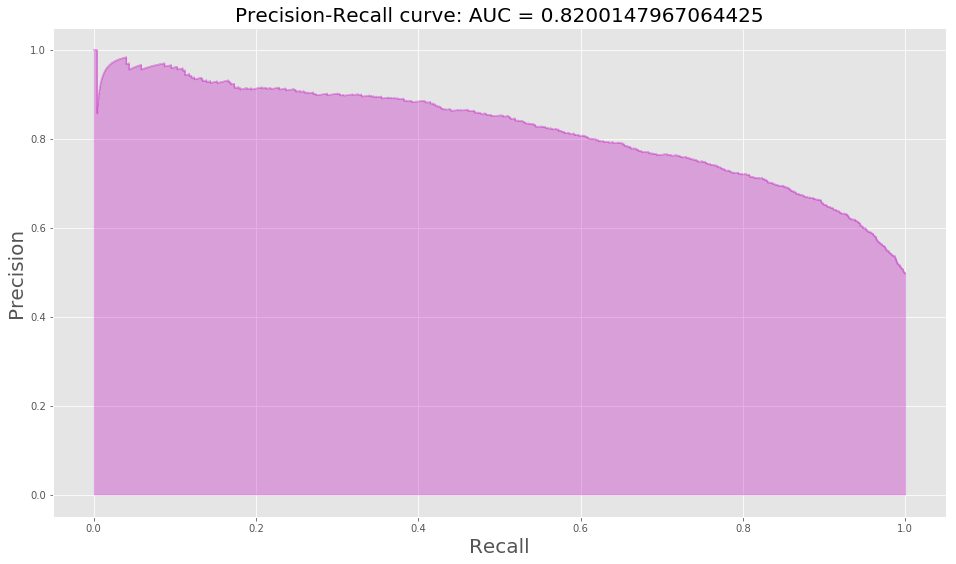

In [50]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
plt.style.use('ggplot')
plt.figure(figsize=(16,9))

precision, recall, _ = precision_recall_curve(Y_test, Y_test_pred_prob[:, 1])
average_precision = average_precision_score(Y_test, Y_test_pred_prob[:, 1])

plt.step(recall, precision, color = 'm', alpha=0.3)
plt.fill_between(recall, precision, alpha=0.3, color='m')
plt.xlabel('Recall', fontsize = 20)
plt.ylabel('Precision', fontsize = 20)
plt.title('Precision-Recall curve: AUC = {}'.format(average_precision), fontsize = 20)
plt.show()

### Plot the ROC_curve

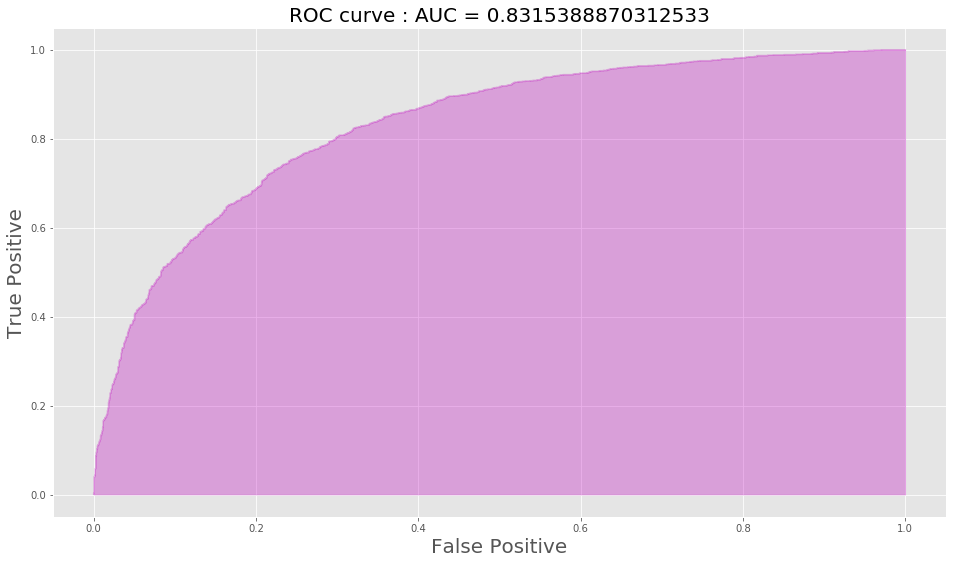

In [51]:
from sklearn.metrics import roc_curve, auc
plt.style.use('ggplot')
plt.figure(figsize=(16,9))

fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_test_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.step(fpr, tpr, color = 'm', alpha=0.3)
plt.fill_between(fpr, tpr, alpha=0.3, color='m')

plt.xlabel('False Positive', fontsize = 20)
plt.ylabel('True Positive', fontsize = 20)
plt.title('ROC curve : AUC = {}'.format(roc_auc), fontsize = 20)
plt.show()